In [66]:
import cv2 as cv
import numpy as np
import os
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plot
import seaborn as sb

In [98]:
def getImages():
    dir = "./data/build"
    image_size = (256, 256)
    data_normal = []
    data_greyscale = []
    labels = []
    for file in os.listdir(dir):
        if (file.endswith(".jpg")):

            #image normal resized to 256*256
            image = Image.open(dir+"/"+file)
            resized_image = image.resize(image_size)
            resized_image_arr = np.array(resized_image)
            data_normal.append(resized_image_arr)

            # images but turned greyscale
            greyscale_image = image.convert("L")
            resized_greyscale_image = greyscale_image.resize(image_size)
            greyscale_image_arr = np.array(resized_greyscale_image)
            data_greyscale.append(greyscale_image_arr)

            labels.append("fire")
    data = np.array(data_normal)
    data_g = np.array(data_greyscale)
    return data, data_g

In [69]:
def normalize_pixels(data):
    return data / 255.0

In [70]:
def standardize_data(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    scaled_data = (data - mean) / std
    return scaled_data

In [92]:
def generate_heatmap(image_array):
    """Generate and display heatmap for an image array."""
    # If it's RGB, you can sum or average the color channels to create a single intensity map
    if image_array.shape[-1] == 3:
        # Summing the intensity across the RGB channels
        heatmap_data = np.sum(image_array, axis=-1)
    else:
        # For grayscale images, use the image array directly
        heatmap_data = image_array
    
    # Create a heatmap
    plot.figure()
    sb.heatmap(heatmap_data)
    plot.axis('off')  # No axis to keep the heatmap clean
    plot.show()

In [94]:
def plot_image(image):
    plot.figure()
    plot.imshow(image)
    plot.show()

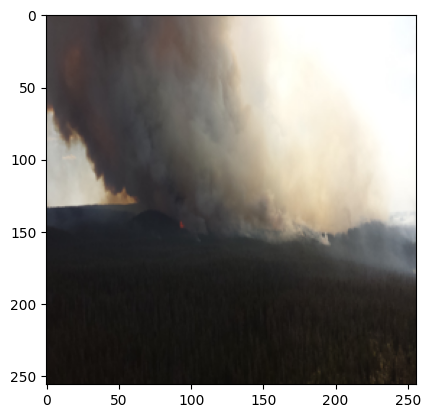

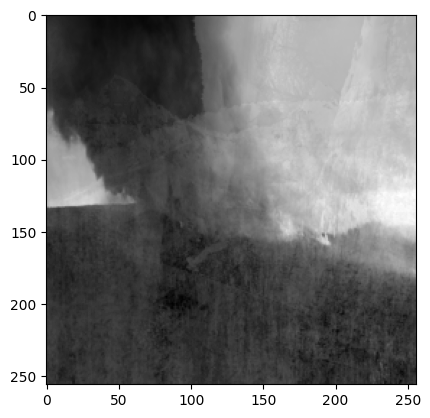

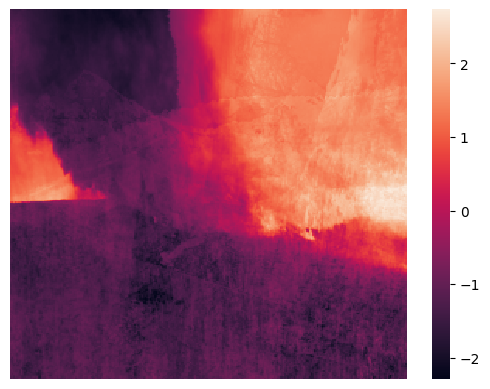

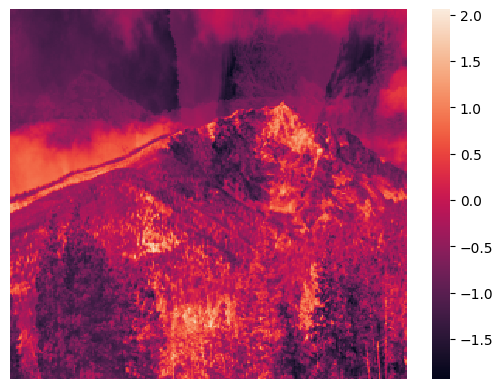

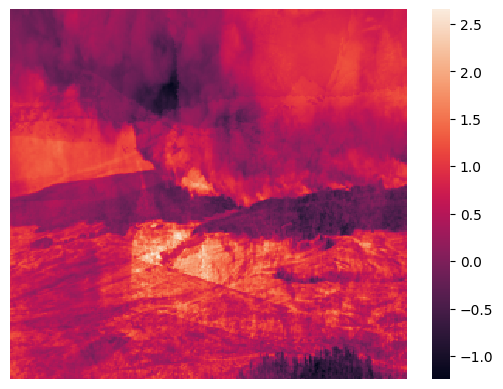

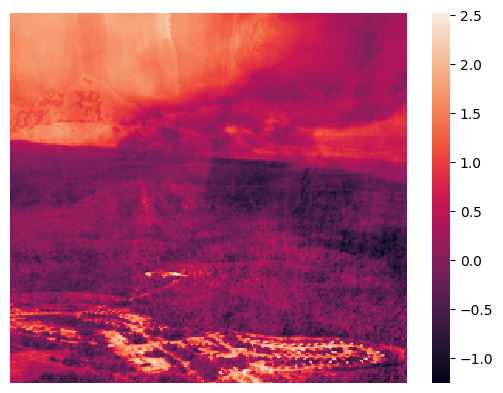

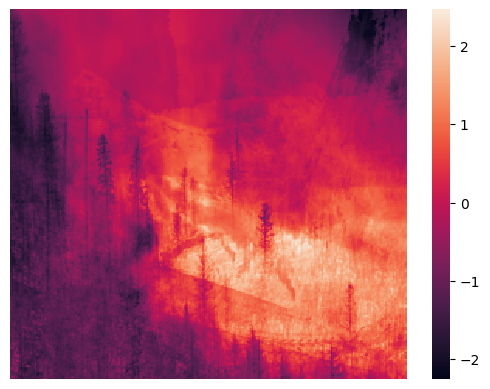

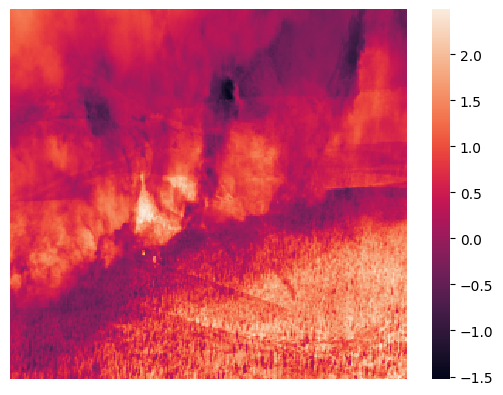

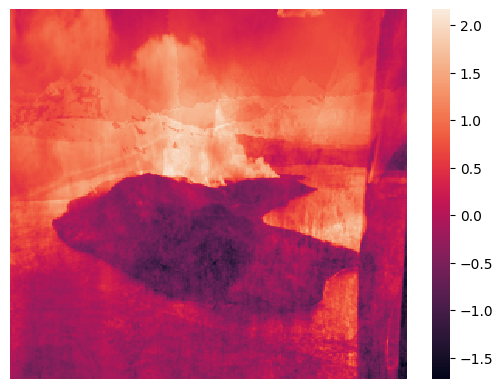

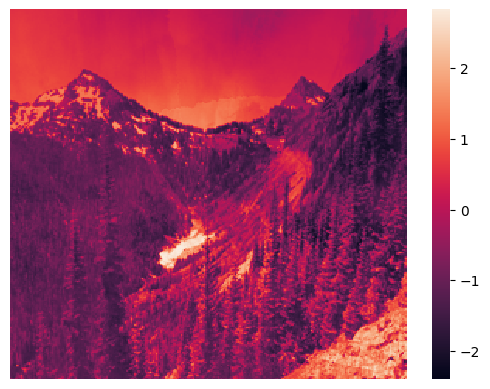

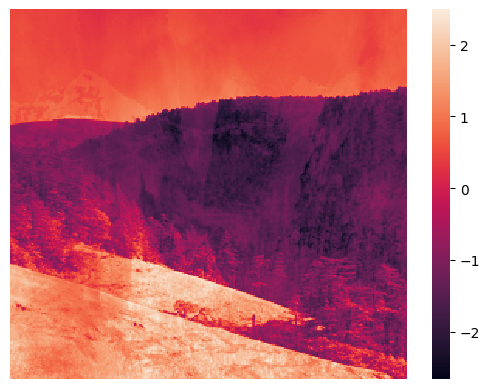

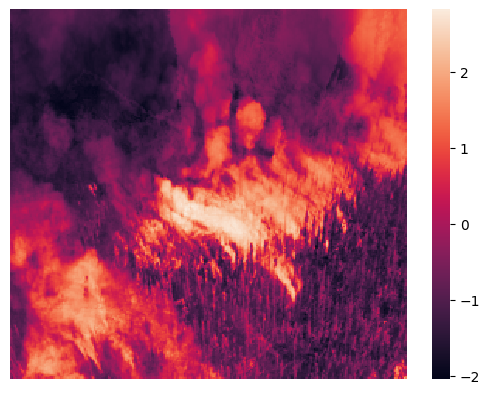

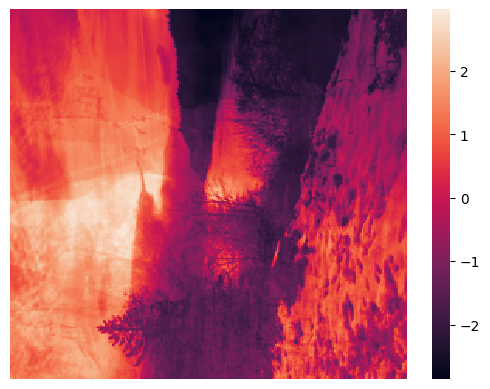

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.7403071319230485..2.7336450324409967].


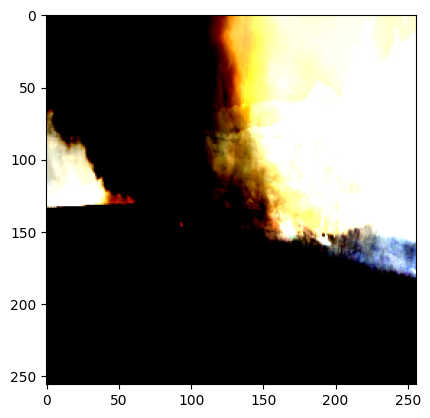

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.6207656171645684..2.368653500928948].


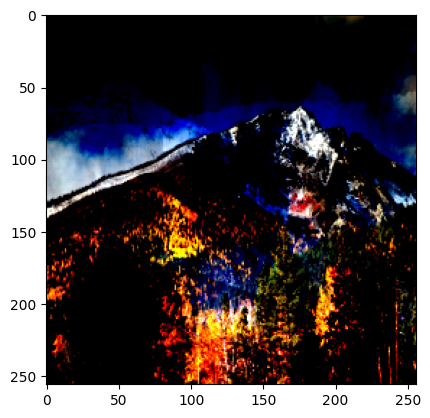

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2970195975514156..2.7043506873576364].


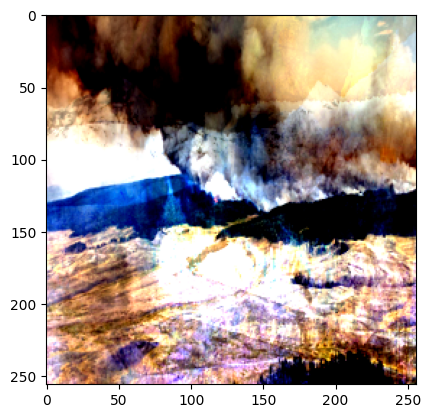

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2960260815899085..2.880972550914221].


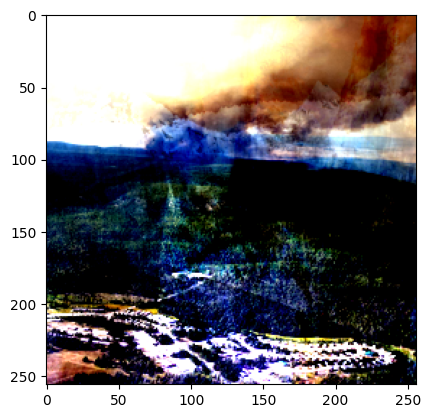

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4423138785549035..2.4824756832628654].


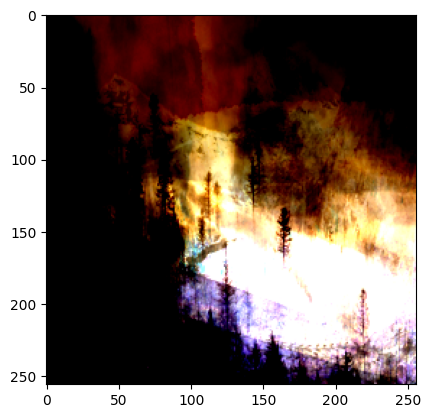

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6722841476204715..2.478565771243047].


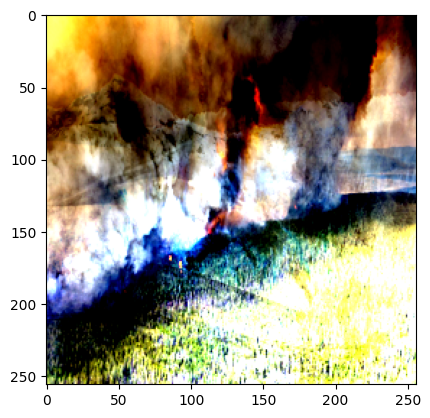

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8911801386439897..2.489966971803157].


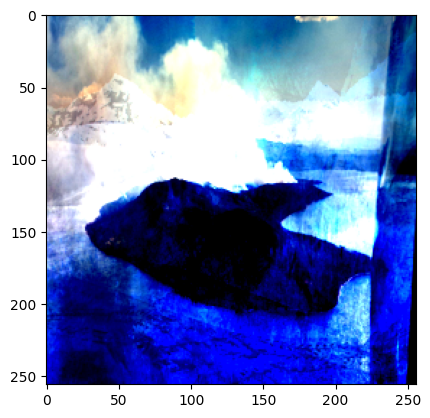

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.484239888334298..2.937440739168524].


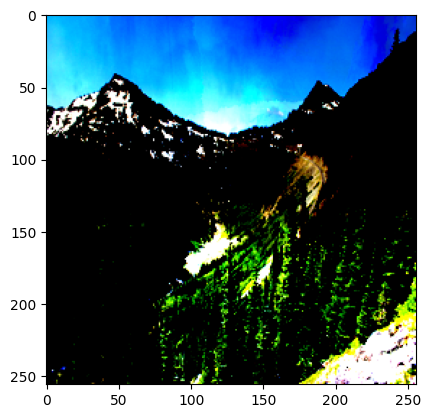

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.749416909914354..2.552894738466681].


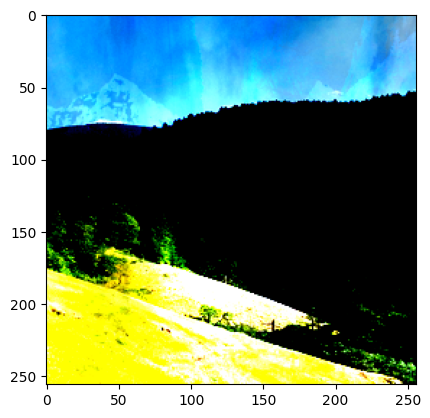

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.100432319519392..2.9276037546348985].


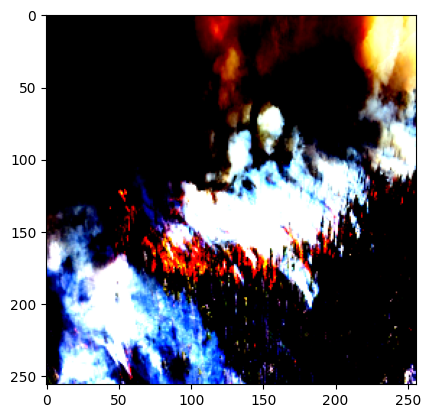

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.863649840721774..3.00101043288594].


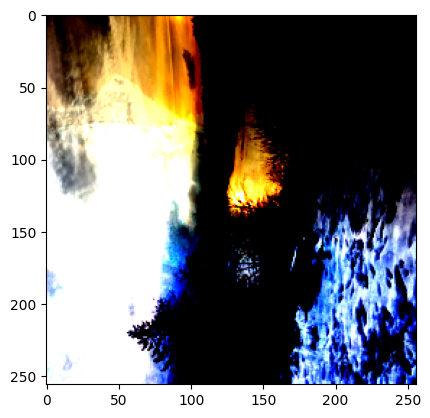

In [99]:
data, grayscale = getImages()

normal_data = normalize_pixels(data)
scaled_data = standardize_data(normal_data)

normal_gray = normalize_pixels(grayscale)
scaled_gray = standardize_data(normal_gray)

plot.figure()
plot.imshow(data[0])
plot.show()
plot.figure()
plot.imshow(scaled_gray[0], cmap='gray')
plot.show()
for image in scaled_gray:
    generate_heatmap(image)
for im in scaled_data:
    plot_image(im)